# Network Analysis - Karl Merisalu

### Load data

In [1]:
# For reading, and transforming data
import pandas as pd 

# For creating network graphs 
import networkx as nx

# To use shortest path and clique-finding algorithms 
from networkx.algorithms import approximation

# For basic mathematical calculations
import math 

# For visualising our networks
import matplotlib.pyplot as plt

# Specifically, for interactive visualisations
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *
from plotly.offline import plot as offpy

### Load and check the data

In [2]:
enron = pd.read_csv('enron_emails.csv')
enron.head()

,from,to
0,greg.whalley,k..allen
1,louise.kitchen,k..allen
2,louise.kitchen,k..allen
3,errol.mclaughlin,john.arnold
4,mike.grigsby,john.arnold


In [5]:
# use networks to create a graoh ibject from this dataframe
g = nx.from_pandas_edgelist(enron, source = 'from', target = 'to', create_using = nx.DiGraph())
g

### Exploring graph properties
Let's explore some of the functions in networkx for studying graphs

In [6]:
# look at the nodes in our graph
g.nodes()

NodeView(('greg.whalley', 'k..allen', 'louise.kitchen', 'errol.mclaughlin', 'john.arnold', 'mike.grigsby', 'john.griffith', 'dutch.quigley', 's..shively', 'richard.shapiro', 'harry.arora', 'sally.beck', 'matthew.lenhart', 'eric.bass', 'a..martin', 'm..love', 'monique.sanchez', 'charles.weldon', 'jeff.king', 'don.baughman', 'w..delainey', 'w..white', 'rod.hayslett', 'rick.buy', 'm..presto', 'robert.benson', 'dana.davis', 'joe.quenet', 'susan.scott', 'michelle.lokay', 'lynn.blair', 'lindy.donoho', 'shelley.corman', 'kimberly.watson', 'bill.rapp', 'scott.neal', 'f..brawner', 'jim.schwieger', 'vladi.pimenov', 'andrea.ring', 'l..mims', 'j.kaminski', 'j..kean', 'a..shankman', 'stanley.horton', 'kenneth.lay', 'f..campbell', 'joe.stepenovitch', 'd..thomas', 'mike.carson', 'eric.saibi', 'j..sturm', 'michelle.cash', 'teb.lokey', 'tracy.geaccone', 'kevin.hyatt', 'darrell.schoolcraft', 'd..steffes', 'cara.semperger', 'sean.crandall', 'cooper.richey', 'diana.scholtes', 'stephanie.panus', 'matt.motl

In [7]:
g.edges()

OutEdgeView([('greg.whalley', 'k..allen'), ('greg.whalley', 'rick.buy'), ('k..allen', 'keith.holst'), ('k..allen', 'kam.keiser'), ('k..allen', 'lavorato'), ('k..allen', 'h..lewis'), ('k..allen', 'a..martin'), ('k..allen', 'scott.neal'), ('k..allen', 'dutch.quigley'), ('k..allen', 'greg.whalley'), ('louise.kitchen', 'k..allen'), ('louise.kitchen', 'john.arnold'), ('louise.kitchen', 'harry.arora'), ('louise.kitchen', 'sally.beck'), ('louise.kitchen', 'robert.benson'), ('louise.kitchen', 'f..brawner'), ('louise.kitchen', 'rick.buy'), ('louise.kitchen', 'mike.carson'), ('louise.kitchen', 'doug.gilbert-smith'), ('louise.kitchen', 'mike.grigsby'), ('louise.kitchen', 'e..haedicke'), ('louise.kitchen', 'lavorato'), ('louise.kitchen', 'a..martin'), ('louise.kitchen', 'larry.may'), ('louise.kitchen', 'l..mims'), ('louise.kitchen', 'scott.neal'), ('louise.kitchen', 'gerald.nemec'), ('louise.kitchen', 'm..presto'), ('louise.kitchen', 'elizabeth.sager'), ('louise.kitchen', 'sara.shackleton'), ('lou

In [8]:
# turn this into a list fo clarity
list(g.nodes())

['greg.whalley',
 'k..allen',
 'louise.kitchen',
 'errol.mclaughlin',
 'john.arnold',
 'mike.grigsby',
 'john.griffith',
 'dutch.quigley',
 's..shively',
 'richard.shapiro',
 'harry.arora',
 'sally.beck',
 'matthew.lenhart',
 'eric.bass',
 'a..martin',
 'm..love',
 'monique.sanchez',
 'charles.weldon',
 'jeff.king',
 'don.baughman',
 'w..delainey',
 'w..white',
 'rod.hayslett',
 'rick.buy',
 'm..presto',
 'robert.benson',
 'dana.davis',
 'joe.quenet',
 'susan.scott',
 'michelle.lokay',
 'lynn.blair',
 'lindy.donoho',
 'shelley.corman',
 'kimberly.watson',
 'bill.rapp',
 'scott.neal',
 'f..brawner',
 'jim.schwieger',
 'vladi.pimenov',
 'andrea.ring',
 'l..mims',
 'j.kaminski',
 'j..kean',
 'a..shankman',
 'stanley.horton',
 'kenneth.lay',
 'f..campbell',
 'joe.stepenovitch',
 'd..thomas',
 'mike.carson',
 'eric.saibi',
 'j..sturm',
 'michelle.cash',
 'teb.lokey',
 'tracy.geaccone',
 'kevin.hyatt',
 'darrell.schoolcraft',
 'd..steffes',
 'cara.semperger',
 'sean.crandall',
 'cooper.riche

In [9]:
list(g.edges())

[('greg.whalley', 'k..allen'),
 ('greg.whalley', 'rick.buy'),
 ('k..allen', 'keith.holst'),
 ('k..allen', 'kam.keiser'),
 ('k..allen', 'lavorato'),
 ('k..allen', 'h..lewis'),
 ('k..allen', 'a..martin'),
 ('k..allen', 'scott.neal'),
 ('k..allen', 'dutch.quigley'),
 ('k..allen', 'greg.whalley'),
 ('louise.kitchen', 'k..allen'),
 ('louise.kitchen', 'john.arnold'),
 ('louise.kitchen', 'harry.arora'),
 ('louise.kitchen', 'sally.beck'),
 ('louise.kitchen', 'robert.benson'),
 ('louise.kitchen', 'f..brawner'),
 ('louise.kitchen', 'rick.buy'),
 ('louise.kitchen', 'mike.carson'),
 ('louise.kitchen', 'doug.gilbert-smith'),
 ('louise.kitchen', 'mike.grigsby'),
 ('louise.kitchen', 'e..haedicke'),
 ('louise.kitchen', 'lavorato'),
 ('louise.kitchen', 'a..martin'),
 ('louise.kitchen', 'larry.may'),
 ('louise.kitchen', 'l..mims'),
 ('louise.kitchen', 'scott.neal'),
 ('louise.kitchen', 'gerald.nemec'),
 ('louise.kitchen', 'm..presto'),
 ('louise.kitchen', 'elizabeth.sager'),
 ('louise.kitchen', 'sara.sh

In [10]:
# check for thoroughness that g is indeed directed
nx.is_directed(g)

True

In [11]:
nx.is_weighted(g)

False

OK we have a durected unweighted graph

In [17]:
# Let's find the degree of each node, i.e. how many emails were sent to or received from each person
list(g.degree())

[('greg.whalley', 18),
 ('k..allen', 10),
 ('louise.kitchen', 31),
 ('errol.mclaughlin', 11),
 ('john.arnold', 14),
 ('mike.grigsby', 28),
 ('john.griffith', 8),
 ('dutch.quigley', 10),
 ('s..shively', 16),
 ('richard.shapiro', 10),
 ('harry.arora', 5),
 ('sally.beck', 23),
 ('matthew.lenhart', 9),
 ('eric.bass', 11),
 ('a..martin', 20),
 ('m..love', 12),
 ('monique.sanchez', 14),
 ('charles.weldon', 6),
 ('jeff.king', 3),
 ('don.baughman', 6),
 ('w..delainey', 6),
 ('w..white', 14),
 ('rod.hayslett', 17),
 ('rick.buy', 14),
 ('m..presto', 13),
 ('robert.benson', 6),
 ('dana.davis', 3),
 ('joe.quenet', 1),
 ('susan.scott', 13),
 ('michelle.lokay', 16),
 ('lynn.blair', 13),
 ('lindy.donoho', 22),
 ('shelley.corman', 18),
 ('kimberly.watson', 21),
 ('bill.rapp', 14),
 ('scott.neal', 20),
 ('f..brawner', 8),
 ('jim.schwieger', 7),
 ('vladi.pimenov', 9),
 ('andrea.ring', 2),
 ('l..mims', 7),
 ('j.kaminski', 4),
 ('j..kean', 11),
 ('a..shankman', 6),
 ('stanley.horton', 11),
 ('kenneth.lay'

In [18]:
list(g.in_degree())

[('greg.whalley', 16),
 ('k..allen', 2),
 ('louise.kitchen', 2),
 ('errol.mclaughlin', 5),
 ('john.arnold', 6),
 ('mike.grigsby', 6),
 ('john.griffith', 0),
 ('dutch.quigley', 6),
 ('s..shively', 8),
 ('richard.shapiro', 2),
 ('harry.arora', 3),
 ('sally.beck', 5),
 ('matthew.lenhart', 1),
 ('eric.bass', 5),
 ('a..martin', 16),
 ('m..love', 3),
 ('monique.sanchez', 3),
 ('charles.weldon', 2),
 ('jeff.king', 1),
 ('don.baughman', 1),
 ('w..delainey', 1),
 ('w..white', 6),
 ('rod.hayslett', 7),
 ('rick.buy', 10),
 ('m..presto', 1),
 ('robert.benson', 6),
 ('dana.davis', 0),
 ('joe.quenet', 0),
 ('susan.scott', 8),
 ('michelle.lokay', 5),
 ('lynn.blair', 5),
 ('lindy.donoho', 14),
 ('shelley.corman', 11),
 ('kimberly.watson', 11),
 ('bill.rapp', 8),
 ('scott.neal', 10),
 ('f..brawner', 6),
 ('jim.schwieger', 0),
 ('vladi.pimenov', 7),
 ('andrea.ring', 1),
 ('l..mims', 4),
 ('j.kaminski', 1),
 ('j..kean', 3),
 ('a..shankman', 0),
 ('stanley.horton', 2),
 ('kenneth.lay', 14),
 ('f..campbell

In [21]:
# we can search for specific edges between specific nodes
g.number_of_edges() # can add 2 arguments with people names to determine the number of emails sent between them

636

In [22]:
print(list(g.successors('greg.whalley')))

['k..allen', 'rick.buy']


In [24]:
print(list(g.predecessors('greg.whalley')))

['richard.shapiro', 'stanley.horton', 'j.kaminski', 'louise.kitchen', 'j..kean', 'kenneth.lay', 'w..delainey', 'sally.beck', 'andy.zipper', 'rick.buy', 'a..shankman', 'h..lewis', 'tom.donohoe', 'jim.schwieger', 'k..allen', 'james.derrick']


### Shortest paths, cliques, centrality measure and all that

In [26]:
# Let's find the shortest path between 2 nodes
nx.shortest_path(g, source = 'greg.whalley', target = 'eric.bass' )

['greg.whalley', 'k..allen', 'a..martin', 'eric.bass']

In [28]:
nx.shortest_path(g, target = 'kenneth.lay') # fingin the shortest oath to a given node from all other starting nodes

{'kenneth.lay': ['kenneth.lay'],
 'james.derrick': ['james.derrick', 'kenneth.lay'],
 'stanley.horton': ['stanley.horton', 'kenneth.lay'],
 'j..kean': ['j..kean', 'kenneth.lay'],
 'tom.donohoe': ['tom.donohoe', 'kenneth.lay'],
 'w..pereira': ['w..pereira', 'kenneth.lay'],
 'richard.shapiro': ['richard.shapiro', 'kenneth.lay'],
 'rick.buy': ['rick.buy', 'kenneth.lay'],
 'a..shankman': ['a..shankman', 'kenneth.lay'],
 'kevin.hyatt': ['kevin.hyatt', 'kenneth.lay'],
 'jim.schwieger': ['jim.schwieger', 'kenneth.lay'],
 'sally.beck': ['sally.beck', 'kenneth.lay'],
 'benjamin.rogers': ['benjamin.rogers', 'kenneth.lay'],
 'danny.mccarty': ['danny.mccarty', 'kenneth.lay'],
 'w..delainey': ['w..delainey', 'kenneth.lay'],
 'michelle.cash': ['michelle.cash', 'james.derrick', 'kenneth.lay'],
 'rod.hayslett': ['rod.hayslett', 'stanley.horton', 'kenneth.lay'],
 'lynn.blair': ['lynn.blair', 'stanley.horton', 'kenneth.lay'],
 'jeff.dasovich': ['jeff.dasovich', 'j..kean', 'kenneth.lay'],
 'chris.germany

In [29]:
nx.degree_centrality(g) # finding degree centrality for each node

{'greg.whalley': 0.13846153846153847,
 'k..allen': 0.07692307692307693,
 'louise.kitchen': 0.23846153846153847,
 'errol.mclaughlin': 0.08461538461538462,
 'john.arnold': 0.1076923076923077,
 'mike.grigsby': 0.2153846153846154,
 'john.griffith': 0.06153846153846154,
 'dutch.quigley': 0.07692307692307693,
 's..shively': 0.12307692307692308,
 'richard.shapiro': 0.07692307692307693,
 'harry.arora': 0.038461538461538464,
 'sally.beck': 0.17692307692307693,
 'matthew.lenhart': 0.06923076923076923,
 'eric.bass': 0.08461538461538462,
 'a..martin': 0.15384615384615385,
 'm..love': 0.09230769230769231,
 'monique.sanchez': 0.1076923076923077,
 'charles.weldon': 0.046153846153846156,
 'jeff.king': 0.023076923076923078,
 'don.baughman': 0.046153846153846156,
 'w..delainey': 0.046153846153846156,
 'w..white': 0.1076923076923077,
 'rod.hayslett': 0.13076923076923078,
 'rick.buy': 0.1076923076923077,
 'm..presto': 0.1,
 'robert.benson': 0.046153846153846156,
 'dana.davis': 0.023076923076923078,
 'joe.

In [43]:
enron_dc = nx.degree_centrality(g)
sorted(enron_dc.items(), key = lambda x: x[1], reverse = True)

[('louise.kitchen', 0.23846153846153847),
 ('mike.grigsby', 0.2153846153846154),
 ('kam.keiser', 0.2076923076923077),
 ('sally.beck', 0.17692307692307693),
 ('lindy.donoho', 0.16923076923076924),
 ('kimberly.watson', 0.16153846153846155),
 ('gerald.nemec', 0.16153846153846155),
 ('a..martin', 0.15384615384615385),
 ('scott.neal', 0.15384615384615385),
 ('kenneth.lay', 0.14615384615384616),
 ('lavorato', 0.14615384615384616),
 ('greg.whalley', 0.13846153846153847),
 ('shelley.corman', 0.13846153846153847),
 ('rod.hayslett', 0.13076923076923078),
 ('john.hodge', 0.13076923076923078),
 ('s..shively', 0.12307692307692308),
 ('michelle.lokay', 0.12307692307692308),
 ('stephanie.panus', 0.12307692307692308),
 ('andy.zipper', 0.12307692307692308),
 ('teb.lokey', 0.11538461538461539),
 ('doug.gilbert-smith', 0.11538461538461539),
 ('jay.reitmeyer', 0.11538461538461539),
 ('sara.shackleton', 0.11538461538461539),
 ('john.arnold', 0.1076923076923077),
 ('monique.sanchez', 0.1076923076923077),
 (

In [40]:
nx.betweenness_centrality(g)


{'greg.whalley': 0.0428123827538389,
 'k..allen': 0.023333275913776805,
 'louise.kitchen': 0.037618216628066636,
 'errol.mclaughlin': 0.023897142743296587,
 'john.arnold': 0.011336949011367616,
 'mike.grigsby': 0.08357457510792202,
 'john.griffith': 0.0,
 'dutch.quigley': 0.01733314358695817,
 's..shively': 0.022325325161839396,
 'richard.shapiro': 0.0061151452072740085,
 'harry.arora': 0.0035523604799096767,
 'sally.beck': 0.11891229150439925,
 'matthew.lenhart': 0.0003538550497405596,
 'eric.bass': 0.03501994163815639,
 'a..martin': 0.045218671150039094,
 'm..love': 0.022745404139627237,
 'monique.sanchez': 0.007979007674893185,
 'charles.weldon': 0.0013905216230797627,
 'jeff.king': 0.007052275889485191,
 'don.baughman': 0.001148876962830451,
 'w..delainey': 0.01916126724266259,
 'w..white': 0.05747749719505868,
 'rod.hayslett': 0.05048431104694472,
 'rick.buy': 0.039135776305423566,
 'm..presto': 0.0009652993899796852,
 'robert.benson': 0.0,
 'dana.davis': 0.0,
 'joe.quenet': 0.0,


In [41]:
nx.eigenvector_centrality(g)


{'greg.whalley': 0.03091903378599063,
 'k..allen': 0.005364228599776185,
 'louise.kitchen': 0.005086344987771196,
 'errol.mclaughlin': 0.0034935226834277677,
 'john.arnold': 0.0041723373291970255,
 'mike.grigsby': 0.0074216998380423034,
 'john.griffith': 1.4900241810625916e-31,
 'dutch.quigley': 0.0028683961653446647,
 's..shively': 0.009128320578303342,
 'richard.shapiro': 0.0012231078983554438,
 'harry.arora': 0.00591351283690085,
 'sally.beck': 0.03338358636133063,
 'matthew.lenhart': 0.0011059860990820802,
 'eric.bass': 0.003680171931131725,
 'a..martin': 0.017422430971664463,
 'm..love': 0.0024778630768450905,
 'monique.sanchez': 0.0018569047203935403,
 'charles.weldon': 0.0018315565837054343,
 'jeff.king': 0.0004316622994654698,
 'don.baughman': 6.433443490972477e-05,
 'w..delainey': 0.0007984986911700113,
 'w..white': 0.008611527045224353,
 'rod.hayslett': 0.1811749175860459,
 'rick.buy': 0.02841197314012276,
 'm..presto': 0.0007577625532725664,
 'robert.benson': 0.0028925675362

In [42]:
nx.in_degree_centrality(g)


{'greg.whalley': 0.12307692307692308,
 'k..allen': 0.015384615384615385,
 'louise.kitchen': 0.015384615384615385,
 'errol.mclaughlin': 0.038461538461538464,
 'john.arnold': 0.046153846153846156,
 'mike.grigsby': 0.046153846153846156,
 'john.griffith': 0.0,
 'dutch.quigley': 0.046153846153846156,
 's..shively': 0.06153846153846154,
 'richard.shapiro': 0.015384615384615385,
 'harry.arora': 0.023076923076923078,
 'sally.beck': 0.038461538461538464,
 'matthew.lenhart': 0.007692307692307693,
 'eric.bass': 0.038461538461538464,
 'a..martin': 0.12307692307692308,
 'm..love': 0.023076923076923078,
 'monique.sanchez': 0.023076923076923078,
 'charles.weldon': 0.015384615384615385,
 'jeff.king': 0.007692307692307693,
 'don.baughman': 0.007692307692307693,
 'w..delainey': 0.007692307692307693,
 'w..white': 0.046153846153846156,
 'rod.hayslett': 0.05384615384615385,
 'rick.buy': 0.07692307692307693,
 'm..presto': 0.007692307692307693,
 'robert.benson': 0.046153846153846156,
 'dana.davis': 0.0,
 'jo

In [44]:
nx.density(g)

0.037345860246623605

In [47]:
# Let's find a 'clique' in the graph i.e a (maximal) complete subgraph
approximation.clique.max_clique(g)

{'kimberly.watson',
 'lindy.donoho',
 'rod.hayslett',
 'shelley.corman',
 'teb.lokey',
 'tracy.geaccone'}

In [48]:
# Create a dataframe of the graph nodes  
names_df = pd.DataFrame(list(g.nodes()), columns=['Name'])

# Map it to a dictionary
names_map = names_df['Name'].to_dict()

names_map

{0: 'greg.whalley',
 1: 'k..allen',
 2: 'louise.kitchen',
 3: 'errol.mclaughlin',
 4: 'john.arnold',
 5: 'mike.grigsby',
 6: 'john.griffith',
 7: 'dutch.quigley',
 8: 's..shively',
 9: 'richard.shapiro',
 10: 'harry.arora',
 11: 'sally.beck',
 12: 'matthew.lenhart',
 13: 'eric.bass',
 14: 'a..martin',
 15: 'm..love',
 16: 'monique.sanchez',
 17: 'charles.weldon',
 18: 'jeff.king',
 19: 'don.baughman',
 20: 'w..delainey',
 21: 'w..white',
 22: 'rod.hayslett',
 23: 'rick.buy',
 24: 'm..presto',
 25: 'robert.benson',
 26: 'dana.davis',
 27: 'joe.quenet',
 28: 'susan.scott',
 29: 'michelle.lokay',
 30: 'lynn.blair',
 31: 'lindy.donoho',
 32: 'shelley.corman',
 33: 'kimberly.watson',
 34: 'bill.rapp',
 35: 'scott.neal',
 36: 'f..brawner',
 37: 'jim.schwieger',
 38: 'vladi.pimenov',
 39: 'andrea.ring',
 40: 'l..mims',
 41: 'j.kaminski',
 42: 'j..kean',
 43: 'a..shankman',
 44: 'stanley.horton',
 45: 'kenneth.lay',
 46: 'f..campbell',
 47: 'joe.stepenovitch',
 48: 'd..thomas',
 49: 'mike.cars

In [49]:

# Create a list of edges - but now with numbers instead of names. We map the names to the numbers using the names_map
# dictionary.

index_tuples = []

for i in range(len(list(g.edges()))):
    index_tuples.append((list(names_map.values()).index(list(g.edges())[i][0]), 
                         list(names_map.values()).index(list(g.edges())[i][1])))
    
    
index_tuples

[(0, 1),
 (0, 23),
 (1, 107),
 (1, 82),
 (1, 111),
 (1, 115),
 (1, 14),
 (1, 35),
 (1, 7),
 (1, 0),
 (2, 1),
 (2, 4),
 (2, 10),
 (2, 11),
 (2, 25),
 (2, 36),
 (2, 23),
 (2, 49),
 (2, 72),
 (2, 5),
 (2, 95),
 (2, 111),
 (2, 14),
 (2, 118),
 (2, 40),
 (2, 35),
 (2, 97),
 (2, 24),
 (2, 102),
 (2, 99),
 (2, 8),
 (2, 57),
 (2, 128),
 (2, 108),
 (2, 96),
 (2, 65),
 (2, 0),
 (2, 21),
 (2, 120),
 (3, 4),
 (3, 82),
 (3, 117),
 (3, 118),
 (3, 7),
 (3, 120),
 (4, 109),
 (4, 111),
 (4, 117),
 (4, 118),
 (4, 3),
 (4, 7),
 (4, 129),
 (4, 120),
 (5, 4),
 (5, 81),
 (5, 86),
 (5, 92),
 (5, 107),
 (5, 82),
 (5, 110),
 (5, 111),
 (5, 12),
 (5, 14),
 (5, 63),
 (5, 38),
 (5, 84),
 (5, 16),
 (5, 28),
 (5, 8),
 (5, 127),
 (5, 51),
 (5, 108),
 (5, 65),
 (5, 129),
 (5, 85),
 (6, 4),
 (6, 109),
 (6, 117),
 (6, 118),
 (6, 103),
 (6, 38),
 (6, 7),
 (6, 120),
 (7, 4),
 (7, 117),
 (7, 3),
 (7, 28),
 (8, 4),
 (8, 94),
 (8, 92),
 (8, 111),
 (8, 14),
 (8, 40),
 (8, 35),
 (8, 128),
 (9, 10),
 (9, 64),
 (9, 42),
 (9, 11

Additional layouts for below available here: https://networkx.github.io/documentation/stable/reference/drawing.html#module-networkx.drawing.layout

In [74]:
# assign 3D coordinates (x,y,z) to each of our nodes yusing a spring_layout algorthm
positions = nx.spectral_layout(g, scale=1, center=None, dim=3) # changing these layouts will give very interesting results when plotting!!
positions

{'greg.whalley': array([ 0.03406733, -0.00495098, -0.00917166]),
 'k..allen': array([ 0.02483983,  0.03808216, -0.02038423]),
 'louise.kitchen': array([ 0.01759142,  0.03361649, -0.00518515]),
 'errol.mclaughlin': array([ 0.02547099,  0.05546998, -0.02618082]),
 'john.arnold': array([ 0.02481135,  0.05253387, -0.02489413]),
 'mike.grigsby': array([ 0.01361399,  0.04684366, -0.02167349]),
 'john.griffith': array([ 0.02745753,  0.06065091, -0.03069742]),
 'dutch.quigley': array([ 0.02529471,  0.05799718, -0.02525469]),
 's..shively': array([ 0.02261358,  0.04682536, -0.02215232]),
 'richard.shapiro': array([ 0.03668703, -0.03517372,  0.00036189]),
 'harry.arora': array([ 0.02593277,  0.02296538, -0.00652623]),
 'sally.beck': array([ 0.02642211,  0.01595622, -0.00721138]),
 'matthew.lenhart': array([ 0.02165078,  0.05105478, -0.02285555]),
 'eric.bass': array([ 0.02300546,  0.05632347, -0.02656157]),
 'a..martin': array([ 0.02083686,  0.0451418 , -0.02116676]),
 'm..love': array([ 0.02320

In [75]:
pos_list = list(positions.values())

pos_list

[array([ 0.03406733, -0.00495098, -0.00917166]),
 array([ 0.02483983,  0.03808216, -0.02038423]),
 array([ 0.01759142,  0.03361649, -0.00518515]),
 array([ 0.02547099,  0.05546998, -0.02618082]),
 array([ 0.02481135,  0.05253387, -0.02489413]),
 array([ 0.01361399,  0.04684366, -0.02167349]),
 array([ 0.02745753,  0.06065091, -0.03069742]),
 array([ 0.02529471,  0.05799718, -0.02525469]),
 array([ 0.02261358,  0.04682536, -0.02215232]),
 array([ 0.03668703, -0.03517372,  0.00036189]),
 array([ 0.02593277,  0.02296538, -0.00652623]),
 array([ 0.02642211,  0.01595622, -0.00721138]),
 array([ 0.02165078,  0.05105478, -0.02285555]),
 array([ 0.02300546,  0.05632347, -0.02656157]),
 array([ 0.02083686,  0.0451418 , -0.02116676]),
 array([ 0.02320335,  0.05650958, -0.02669934]),
 array([ 0.01746693,  0.0553267 , -0.02511793]),
 array([ 0.02261953,  0.05866392, -0.02385631]),
 array([-0.02257901,  0.03813765,  0.00726574]),
 array([0.00920862, 0.05471518, 0.01167427]),
 array([ 0.03440436, -0

In [76]:
# Let's set some node attributes so that we can refer to them later in plotly
nx.set_node_attributes(g, nx.degree_centrality(g), 'Degree Centrality')
nx.set_node_attributes(g, nx.betweenness_centrality(g), 'Betweenness Centrality')
nx.set_node_attributes(g, nx.eigenvector_centrality(g), 'Eigenvector Centrality')
nx.set_node_attributes(g, nx.in_degree_centrality(g), 'In-degree Centrality')

### Let's plot!

In [77]:
# Number of nodes
N2=len(g.nodes())

# Number of edges
L2=len(g.edges())

# Setting coordinates of the nodes based on the values from the pos_list we created earlier
Xn=[pos_list[k][0] for k in range(N2)]# x-coordinates 
Yn=[pos_list[k][1] for k in range(N2)]# y-coordinates
Zn=[pos_list[k][2] for k in range(N2)]# z-coordinates

# Setting coordinates of edge beginnings and ends
Xe=[]
Ye=[]
Ze=[]
for e in index_tuples:
    Xe+=[pos_list[e[0]][0],pos_list[e[1]][0], None]# x-coordinates of edge ends
    Ye+=[pos_list[e[0]][1],pos_list[e[1]][1], None]  
    Ze+=[pos_list[e[0]][2],pos_list[e[1]][2], None]
    

###### Feel free to experiment with the scale variable!

# Scale of the node size. You can change this to change the sizes of the nodes depending on what you find most useful.    
scale1 = [200*x for x in nx.get_node_attributes(g, 'Degree Centrality').values()]

######

    
# Creating a 'trace' (plotly object) for the edges
trace1=go.Scatter3d(x=Xe,
               y=Ye,
               z=Ze,
               mode='lines',
               line=dict(color='rgb(125,125,125)', width=1),
               hoverinfo='none'
               )

# Creating a trace for the nodes 
trace2=go.Scatter3d(x=Xn,
               y=Yn,
               z=Zn,
               mode='markers',
               name='actors',
               marker=dict(symbol='circle',
                             size= scale1,
                             colorscale='Viridis',
                             line=dict(color='rgb(50,50,50)', width=0.5)
                             ),
               text=list(nx.get_node_attributes(g, 'Degree Centrality').keys()),
               hoverinfo='text'
               )

# Modifying axis properties
axis=dict(showbackground=False,
          showline=False,
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title=''
          )

# Modifying layout properties
layout = go.Layout(
         title="Degree centrality in the Enron employee network",
         width=1000,
         height=1000,
         showlegend=False,
         scene=dict(
             xaxis=dict(axis),
             yaxis=dict(axis),
             zaxis=dict(axis),
        ),
     margin=dict(
        t=100
    ),
    hovermode='closest',
    annotations=[
           dict(
           showarrow=False,
            text="",
            xref='paper',
            yref='paper',
            x=0,
            y=0.1,
            xanchor='left',
            yanchor='bottom',
            font=dict(
            size=14
            )
            )
        ],    )

# Combining traces in one list
data=[trace1, trace2]

# Passing the list to the Figure() function
fig1=go.Figure(data=data, layout=layout)

offpy(fig1, filename='Enron Emails -- Degree Centrality')

# Or to view the graph online
#py.iplot(fig1, filename='Enron Emails -- Degree Centrality')

'file://C:\\Users\\Decoded\\Desktop\\network-analysis-helpers-master\\network-analysis-helpers-master\\Enron Emails -- Degree Centrality.html'

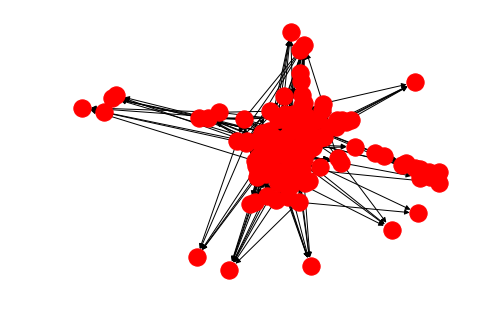

In [57]:
nx.draw(g)

### Eigenvector

In [59]:
# Number of nodes
N2=len(g.nodes())

# Number of edges
L2=len(g.edges())

# Setting coordinates of the nodes based on the values from the pos_list we created earlier
Xn=[pos_list[k][0] for k in range(N2)]# x-coordinates 
Yn=[pos_list[k][1] for k in range(N2)]# y-coordinates
Zn=[pos_list[k][2] for k in range(N2)]# z-coordinates

# Setting coordinates of edge beginnings and ends
Xe=[]
Ye=[]
Ze=[]
for e in index_tuples:
    Xe+=[pos_list[e[0]][0],pos_list[e[1]][0], None]# x-coordinates of edge ends
    Ye+=[pos_list[e[0]][1],pos_list[e[1]][1], None]  
    Ze+=[pos_list[e[0]][2],pos_list[e[1]][2], None]
    

###### Feel free to experiment with the scale variable!

# Scale of the node size. You can change this to change the sizes of the nodes depending on what you find most useful.    
scale3 = [75*x for x in nx.get_node_attributes(g, 'Eigenvector Centrality').values()]

######

    
# Creating a 'trace' (plotly object) for the edges
trace1=go.Scatter3d(x=Xe,
               y=Ye,
               z=Ze,
               mode='lines',
               line=dict(color='rgb(125,125,125)', width=1),
               hoverinfo='none'
               )

# Creating a trace for the nodes 
trace2=go.Scatter3d(x=Xn,
               y=Yn,
               z=Zn,
               mode='markers',
               name='actors',
               marker=dict(symbol='circle',
                             size= scale3,
                             colorscale='Viridis',
                             line=dict(color='rgb(50,50,50)', width=0.5)
                             ),
               text=list(nx.get_node_attributes(g, 'Eigenvector Centrality').keys()),
               hoverinfo='text'
               )

# Modifying axis properties
axis=dict(showbackground=False,
          showline=False,
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title=''
          )

# Modifying layout properties
layout = go.Layout(
         title="Eigenvector centrality in the Enron employee network",
         width=1000,
         height=1000,
         showlegend=False,
         scene=dict(
             xaxis=dict(axis),
             yaxis=dict(axis),
             zaxis=dict(axis),
        ),
     margin=dict(
        t=100
    ),
    hovermode='closest',
    annotations=[
           dict(
           showarrow=False,
            text="",
            xref='paper',
            yref='paper',
            x=0,
            y=0.1,
            xanchor='left',
            yanchor='bottom',
            font=dict(
            size=14
            )
            )
        ],    )

# Combining traces in one list
data=[trace1, trace2]

# Passing the list to the Figure() function
fig3=go.Figure(data=data, layout=layout)

offpy(fig3, filename='Enron Emails -- Eigenvector Centrality')

# Or to view the graph online
#py.iplot(fig3, filename='Enron Emails -- Eigenvector Centrality')

T:\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `Enron Emails -- Eigenvector Centrality` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Decoded\\Desktop\\network-analysis-helpers-master\\network-analysis-helpers-master\\Enron Emails -- Eigenvector Centrality.html'

In [61]:
# Number of nodes
N2=len(g.nodes())

# Number of edges
L2=len(g.edges())

# Setting coordinates of the nodes based on the values from the pos_list we created earlier
Xn=[pos_list[k][0] for k in range(N2)]# x-coordinates 
Yn=[pos_list[k][1] for k in range(N2)]# y-coordinates
Zn=[pos_list[k][2] for k in range(N2)]# z-coordinates

# Setting coordinates of edge beginnings and ends
Xe=[]
Ye=[]
Ze=[]
for e in index_tuples:
    Xe+=[pos_list[e[0]][0],pos_list[e[1]][0], None]# x-coordinates of edge ends
    Ye+=[pos_list[e[0]][1],pos_list[e[1]][1], None]  
    Ze+=[pos_list[e[0]][2],pos_list[e[1]][2], None]
    

###### Feel free to experiment with the scale variable!

# Scale of the node size. You can change this to change the sizes of the nodes depending on what you find most useful.    
scale4 = [300*x for x in nx.get_node_attributes(g, 'In-degree Centrality').values()]

######

    
# Creating a 'trace' (plotly object) for the edges
trace1=go.Scatter3d(x=Xe,
               y=Ye,
               z=Ze,
               mode='lines',
               line=dict(color='rgb(125,125,125)', width=1),
               hoverinfo='none'
               )

# Creating a trace for the nodes 
trace2=go.Scatter3d(x=Xn,
               y=Yn,
               z=Zn,
               mode='markers',
               name='actors',
               marker=dict(symbol='circle',
                             size= scale4,
                             colorscale='Viridis',
                             line=dict(color='rgb(50,50,50)', width=0.5)
                             ),
               text=list(nx.get_node_attributes(g, 'In-degree Centrality').keys()),
               hoverinfo='text'
               )

# Modifying axis properties
axis=dict(showbackground=False,
          showline=False,
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title=''
          )

# Modifying layout properties
layout = go.Layout(
         title="In-degree centrality in the Enron employee network",
         width=1000,
         height=1000,
         showlegend=False,
         scene=dict(
             xaxis=dict(axis),
             yaxis=dict(axis),
             zaxis=dict(axis),
        ),
     margin=dict(
        t=100
    ),
    hovermode='closest',
    annotations=[
           dict(
           showarrow=False,
            text="",
            xref='paper',
            yref='paper',
            x=0,
            y=0.1,
            xanchor='left',
            yanchor='bottom',
            font=dict(
            size=14
            )
            )
        ],    )

# Combining traces in one list
data=[trace1, trace2]

# Passing the list to the Figure() function
fig4=go.Figure(data=data, layout=layout)

offpy(fig4, filename='Enron Emails -- In-degree Centrality')

# Or to view the graph online
#py.iplot(fig4, filename='Enron Emails -- In-degree Centrality')

'file://C:\\Users\\Decoded\\Desktop\\network-analysis-helpers-master\\network-analysis-helpers-master\\Enron Emails -- In-degree Centrality.html'